In [1]:
# !/usr/bin/env python
# -*- coding: utf-8 -*-
# @Time    : 2021-05-29
# @Author  : yuanleiqi
# @File    : Ising.py

import numpy as np
import matplotlib.pyplot as plt
from math import *
import random
from matplotlib import rcParams
config = {
    "font.family": 'DejaVu serif',
    "font.size": 30,
    "mathtext.fontset": 'stix',
    "font.serif": ['SimSong-Regular'],
}

rcParams.update(config)

1
2
3
4
5


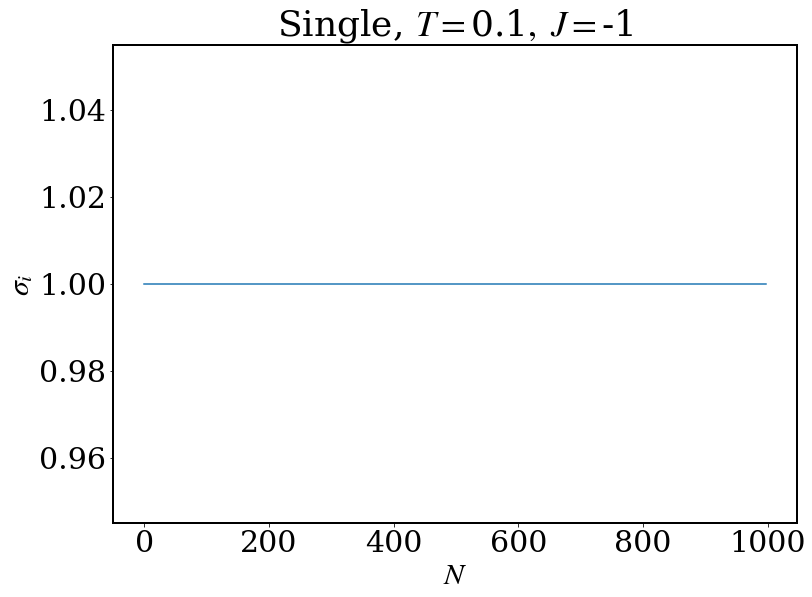

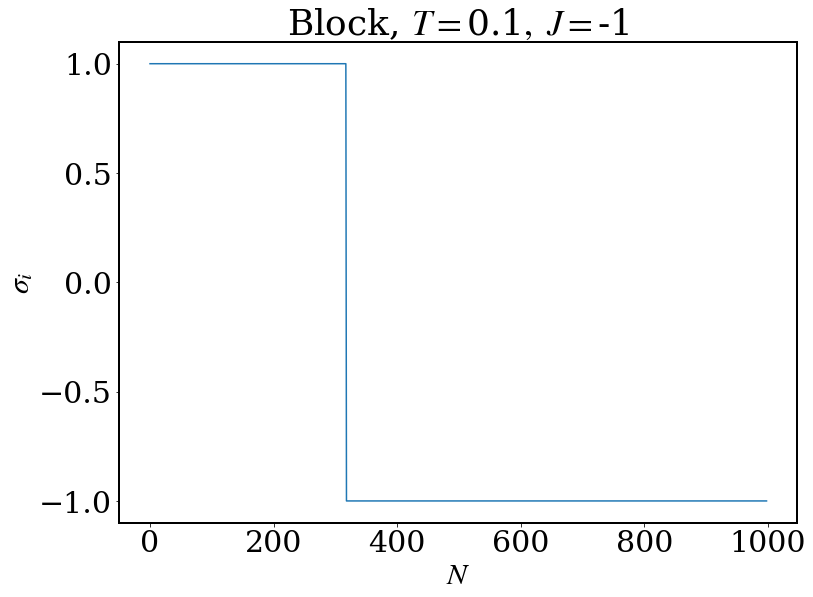

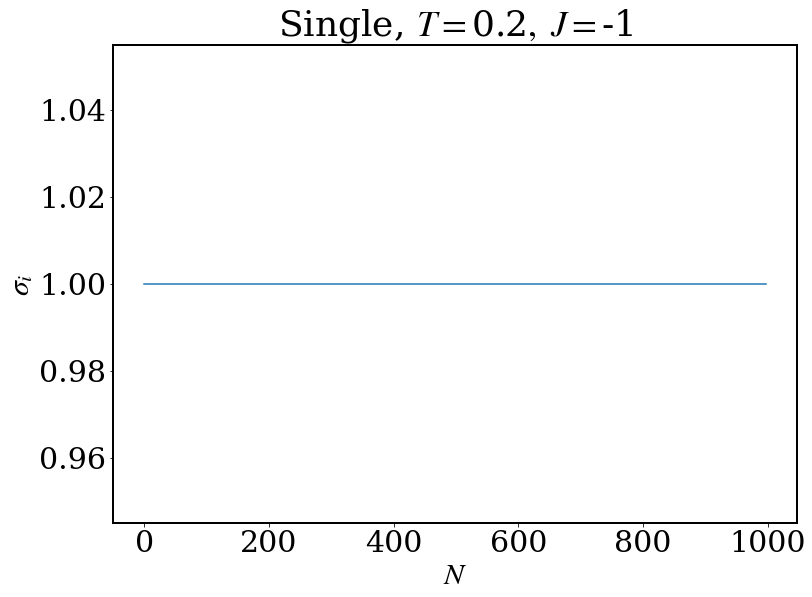

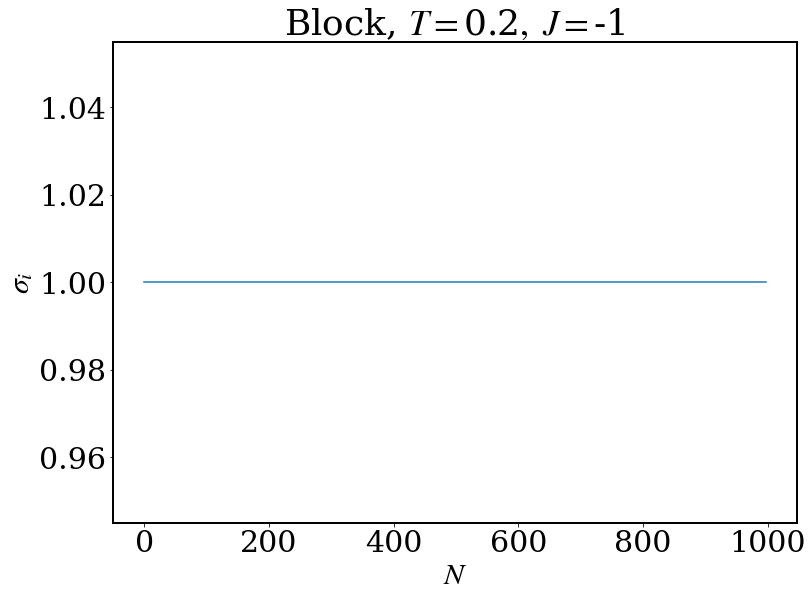

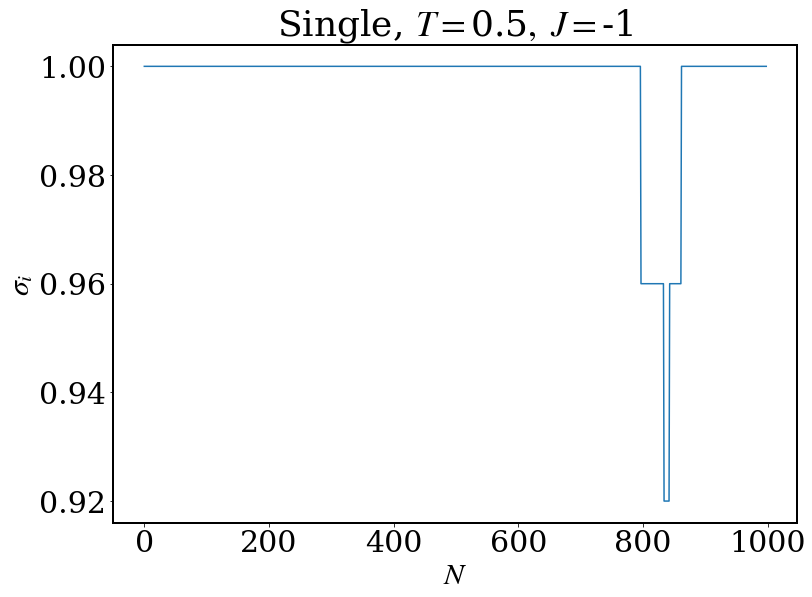

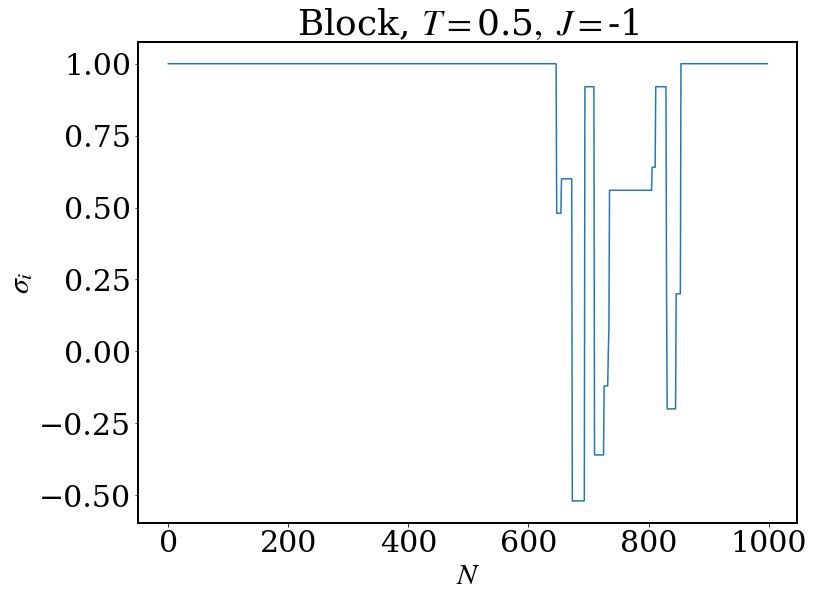

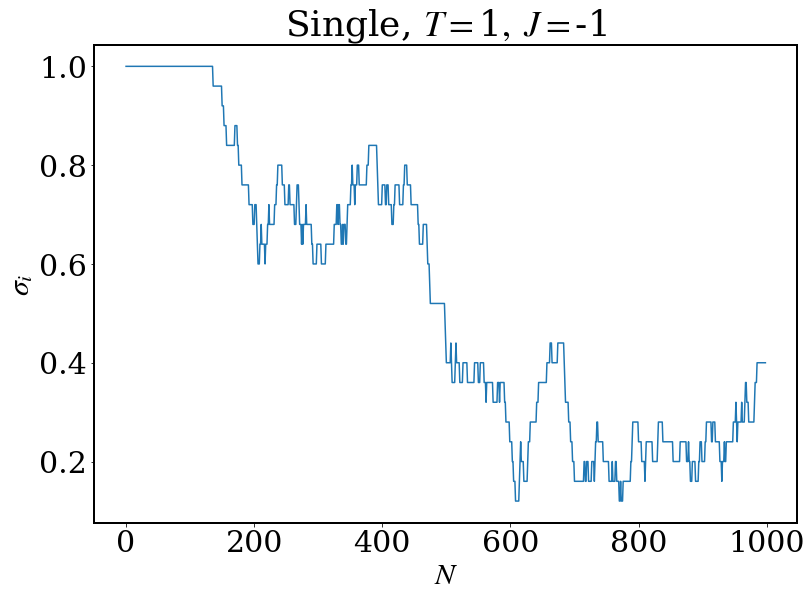

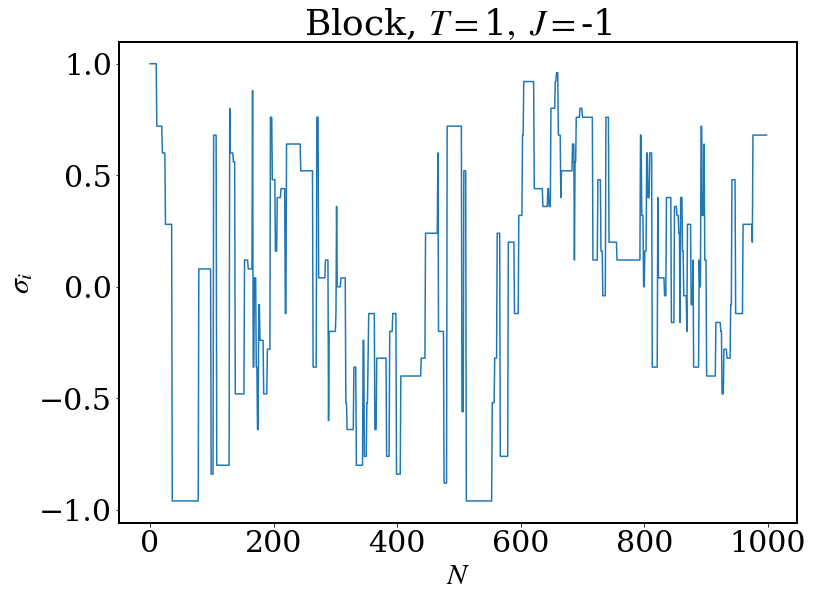

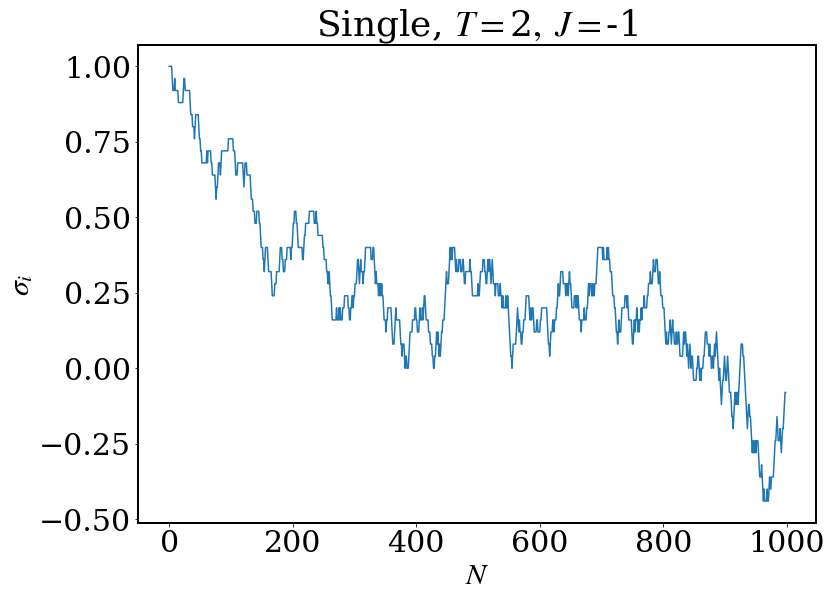

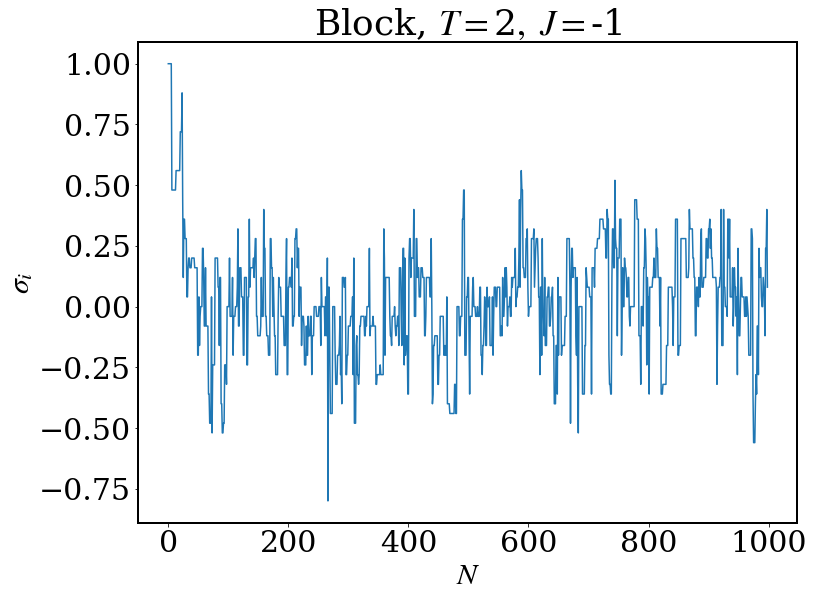

In [2]:
def f_e(x, y):
    global J
    return J * x * y


def f_exp(x, y):
    # print(exp((-x/y)))
    return exp(float(-x / y))


global J
num = 50
N = int(1e2)
J = 1
ave_sig = np.zeros((2, 5))
Tn = 0
#
for T in [0.1, 0.2, 0.5, 1, 2]:
    sig_s = np.ones(num, int)
    mean_sig_s = np.zeros(N - 1)
    E_s = np.zeros(N)

    for i in range(num):
        E_s[0] += f_e(sig_s[i], sig_s[(i + 1) % num])

    # single particle process
    for i in range(N - 1):
        mean_sig_s[i] = np.mean(sig_s)
        rho_before = f_exp(E_s[i], T)
        temp_sig_s = sig_s.copy()
        n_new = random.randint(0, num - 1)
        temp_sig_s[n_new] *= -1
        E_s[i+1] = E_s[i]-f_e(sig_s[n_new], sig_s[(n_new+1) % num])-f_e(sig_s[n_new], sig_s[(n_new-1) % num]) + \
            f_e(temp_sig_s[n_new], temp_sig_s[(n_new-1) % num]) + \
            f_e(temp_sig_s[n_new], temp_sig_s[(n_new+1) % num])
        # print(E_s[i+1])
        rho_after = f_exp(E_s[i + 1], T)
        if rho_before > rho_after:
            test = random.random()
            if test < float(rho_after / rho_before):
                sig_s = temp_sig_s
            else:
                E_s[i + 1] = E_s[i]
        else:
            sig_s = temp_sig_s

    figsize = 12, 9
    figure, ax = plt.subplots(figsize=figsize)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)

    plt.tick_params(labelsize=30)
    labels = ax.get_xticklabels() + ax.get_yticklabels()

    # plt.plot(E_s, bins=50, density=True)
    plt.plot(mean_sig_s)

    plt.xlabel(r'$N$')
    plt.ylabel(r'$\sigma_i$')
    plt.title(r'Single, $T=$' + str(T) + '$,\ J=$' + str(J))
    plt.tight_layout()
    plt.savefig('fig/sig_s_T' + str(T) + 'J' + str(J) + '.pdf')
    # plt.show()
    ave_sig[0, Tn] = np.mean(mean_sig_s[int(0.3 * N):N - 2])
    #     Tn = Tn + 1

    # Block
    sig_b = np.ones(num, int)
    mean_sig_b = np.zeros(N - 1)
    E_b = np.zeros(N)

    for i in range(num):
        E_b[0] += f_e(sig_b[i], sig_b[(i + 1) % num])

    # block process
    for i in range(N - 1):
        mean_sig_b[i] = np.mean(sig_b)
        rho_before = f_exp(E_b[i], T)
        temp_sig_b = sig_b.copy()
        n_new1 = random.randint(0, num - 1)
        n_new2 = random.randint(0, num - 1)
        if n_new1 > n_new2:
            temp = n_new1
            n_new1 = n_new2
            n_new2 = temp
        for j in range(n_new1, n_new2 + 1):
            temp_sig_b[j] *= -1
        for j in range(num):
            E_b[i + 1] += f_e(temp_sig_b[j], temp_sig_b[(j + 1) % num])
        # print(E_b[(i+1)%num])
        rho_after = f_exp(E_b[i + 1], T)
        if rho_before > rho_after:
            test = random.random()
            if test < (rho_after / rho_before):
                sig_b = temp_sig_b
            else:
                E_b[i + 1] = E_b[i]
        else:
            sig_b = temp_sig_b

    figsize = 12, 9
    figure, ax = plt.subplots(figsize=figsize)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)

    plt.tick_params(labelsize=30)
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    plt.plot(mean_sig_b)

    plt.xlabel(r'$N$')
    plt.ylabel(r'$\sigma_i$')
    plt.title(r'Block, $T=$' + str(T) + '$,\ J=$' + str(J))
    plt.tight_layout()
    plt.savefig('fig/sig_b_T' + str(T) + 'J' + str(J) + '.pdf')
    #     plt.show()
    ave_sig[1, Tn] = np.mean(mean_sig_b[int(0.3 * N):N - 1])
    Tn = Tn + 1
    print(Tn)

In [3]:
ave_sig = np.load('ave_sigJ1.npy')
figsize = 12, 9
figure, ax = plt.subplots(figsize=figsize)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.tick_params(labelsize=30)
labels = ax.get_xticklabels() + ax.get_yticklabels()
plt.plot([0.1, 0.2, 0.5, 1, 2], abs(ave_sig[0, :]))
plt.xlabel(r'$T$')
plt.ylabel(r'$<\sigma_i>$')
plt.title(r'Single, ' + '$\ J=$' + str(J))
plt.tight_layout()
plt.savefig('fig/ave_s' + 'J' + str(J) + '.pdf')
# plt.show()

figsize = 12, 9
figure, ax = plt.subplots(figsize=figsize)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
plt.tick_params(labelsize=30)
labels = ax.get_xticklabels() + ax.get_yticklabels()
plt.plot([0.1, 0.2, 0.5, 1, 2], abs(ave_sig[1, :]))
plt.xlabel(r'$T$')
plt.ylabel(r'$<\sigma_i>$')
plt.title(r'Block, ' + '$\ J=$' + str(J))
plt.tight_layout()
plt.savefig('fig/ave_b' + 'J' + str(J) + '.pdf')
np.save('ave_sig' + 'J' + str(J) + '.npy', ave_sig)

FileNotFoundError: [Errno 2] No such file or directory: 'ave_sigJ1.npy'